In [63]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from os import listdir

In [3]:
eda_list = ['streaming_eda_bayes_99_16_euclidean.csv','streaming_eda_bayes_99_4_euclidean.csv',
            'streaming_eda_bayes_99_16_mahalanobis.csv','streaming_eda_bayes_99_4_mahalanobis.csv',
            'streaming_eda_bayes_99_0_cosine.csv','streaming_eda_bayes_99_19_cosine.csv',
            'streaming_eda_bayes_99_5_cosine.csv','streaming_eda_bayes_99_0_euclidean.csv',
            'streaming_eda_bayes_99_19_euclidean.csv','streaming_eda_bayes_99_5_euclidean.csv',
            'streaming_eda_bayes_99_0_mahalanobis.csv','streaming_eda_bayes_99_19_mahalanobis.csv',
            'streaming_eda_bayes_99_5_mahalanobis.csv','streaming_eda_bayes_99_10_cosine.csv',
            'streaming_eda_bayes_99_1_cosine.csv','streaming_eda_bayes_99_6_cosine.csv',
            'streaming_eda_bayes_99_10_euclidean.csv','streaming_eda_bayes_99_1_euclidean.csv',
            'streaming_eda_bayes_99_6_euclidean.csv','streaming_eda_bayes_99_10_mahalanobis.csv',
            'streaming_eda_bayes_99_1_mahalanobis.csv','streaming_eda_bayes_99_6_mahalanobis.csv',
            'streaming_eda_bayes_99_11_cosine.csv','streaming_eda_bayes_99_22_cosine.csv',
            'streaming_eda_bayes_99_7_cosine.csv','streaming_eda_bayes_99_11_euclidean.csv',
            'streaming_eda_bayes_99_22_euclidean.csv','streaming_eda_bayes_99_7_euclidean.csv',
            'streaming_eda_bayes_99_11_mahalanobis.csv','streaming_eda_bayes_99_22_mahalanobis.csv',
            'streaming_eda_bayes_99_7_mahalanobis.csv','streaming_eda_bayes_99_12_cosine.csv',
            'streaming_eda_bayes_99_2_cosine.csv','streaming_eda_bayes_99_8_cosine.csv',
            'streaming_eda_bayes_99_12_euclidean.csv','streaming_eda_bayes_99_2_euclidean.csv',
            'streaming_eda_bayes_99_8_euclidean.csv','streaming_eda_bayes_99_12_mahalanobis.csv',
            'streaming_eda_bayes_99_2_mahalanobis.csv','streaming_eda_bayes_99_8_mahalanobis.csv',
            'streaming_eda_bayes_99_13_cosine.csv','streaming_eda_bayes_99_3_cosine.csv',
            'streaming_eda_bayes_99_9_cosine.csv','streaming_eda_bayes_99_13_euclidean.csv',
            'streaming_eda_bayes_99_3_euclidean.csv','streaming_eda_bayes_99_9_euclidean.csv',
            'streaming_eda_bayes_99_13_mahalanobis.csv','streaming_eda_bayes_99_3_mahalanobis.csv',
            'streaming_eda_bayes_99_9_mahalanobis.csv','streaming_eda_bayes_99_16_cosine.csv',
            'streaming_eda_bayes_99_4_cosine.csv']

In [4]:
prob_list = ['bayes_prob_99_4.csv','bayes_prob_99_5.csv','bayes_prob_99_6.csv','bayes_prob_99_7.csv',
             'bayes_prob_99_0.csv','bayes_prob_99_3.csv','bayes_prob_99_8.csv','bayes_prob_99_9.csv',
             'bayes_prob_99_10.csv','bayes_prob_99_11.csv','bayes_prob_99_12.csv','bayes_prob_99_13.csv',
             'bayes_prob_99_15.csv','bayes_prob_99_16.csv','bayes_prob_99_18.csv','bayes_prob_99_19.csv',
             'bayes_prob_99_1.csv','bayes_prob_99_21.csv','bayes_prob_99_22.csv','bayes_prob_99_2.csv']

In [70]:
arc_list = listdir('results_99/')

prob_list = []
eda_list = []

for arc in arc_list:
    if arc.split('_')[0] == 'streaming':
        eda_list.append(arc)
    else:
        prob_list.append(arc)
        
print(len(eda_list))
print(len(prob_list))

51
20


In [93]:
y = np.ones((len(eda)))
y[:int(len(eda)*0.99)] = 0

distances_dict={
    'euclidean':{
        'eda':{
            'bc': np.zeros((int(6000*0.99))),
            'sg': np.zeros((int(6000*0.01))),
            'ct': 0
        }
    },
    'cosine':{
        'eda':{
            'bc': np.zeros((int(6000*0.99))),
            'sg': np.zeros((int(6000*0.01))),
            'ct': 0
        }
    },
    'mahalanobis':{
        'eda':{
            'bc': np.zeros((int(6000*0.99))),
            'sg': np.zeros((int(6000*0.01))),
            'ct': 0
        }
    },
    'Bayes Probability':{
            'bc': np.zeros((int(6000*0.99))),
            'sg': np.zeros((int(6000*0.01))),
            'ct': 0
        }
}

for arc in eda_list:
    distance = arc.split('_')[5].split('.')[0]
    eda = np.genfromtxt('results_99/'+arc,delimiter=',')
    eda = np.sort(eda)
    distances_dict[distance]['eda']['bc']+= eda[y==0]
    distances_dict[distance]['eda']['sg']+= eda[y==1]
    distances_dict[distance]['eda']['ct']+= 1

distances_dict[distance]['eda']['bc'] /= distances_dict[distance]['eda']['ct']
distances_dict[distance]['eda']['sg'] /= distances_dict[distance]['eda']['ct']

bac_prob_sum = np.zeros((int(6000*0.99)))
sig_prob_sum = np.zeros((int(6000*0.01)))

for arc in prob_list:
    prob = np.genfromtxt('results_99/'+arc,delimiter=',')
    prob = np.sort(prob)
    distances_dict['Bayes Probability']['bc']+= prob[y==0]
    distances_dict['Bayes Probability']['sg']+= prob[y==1]
    distances_dict['Bayes Probability']['ct']+= 1
    
distances_dict['Bayes Probability']['bc'] /= distances_dict['Bayes Probability']['ct']
distances_dict['Bayes Probability']['sg'] /= distances_dict['Bayes Probability']['ct']

In [94]:
distances_dict

{'euclidean': {'eda': {'bc': array([4.03184514e-02, 2.27066773e+01, 3.12824757e+01, ...,
          3.82367583e+03, 3.82928920e+03, 3.83128249e+03]),
   'sg': array([3836.08134978, 3840.97729429, 3842.4225164 , 3845.1127857 ,
          3847.41895445, 3850.05910147, 3851.41774219, 3855.34946234,
          3857.8499733 , 3864.76205628, 3870.91768782, 3872.68701367,
          3879.06028121, 3882.91556819, 3887.46128683, 3891.2104897 ,
          3895.28621153, 3902.42562273, 3905.57059012, 3908.5095025 ,
          3910.45935858, 3916.04965898, 3923.24247254, 3928.74656693,
          3942.96555782, 3949.55491539, 3952.47388418, 3959.72092041,
          3964.77617522, 3972.4102647 , 3979.2918734 , 3988.269193  ,
          4001.74204137, 4010.62564593, 4020.82513342, 4029.91240915,
          4036.73224279, 4048.06990011, 4056.94687884, 4062.94883653,
          4072.35415768, 4080.67614159, 4092.28935395, 4103.59657711,
          4118.71061195, 4130.21409226, 4140.70008242, 4146.28738276,
     

In [95]:
distances_dict['euclidean']['eda'].keys()


dict_keys(['bc', 'sg', 'ct'])

In [96]:
distances_dict['Bayes Probability'].keys()

dict_keys(['bc', 'sg', 'ct'])

euclidean
       fitted kde
        plotted
cosine
       fitted kde
        plotted
mahalanobis
       fitted kde
        plotted
Bayes Probability


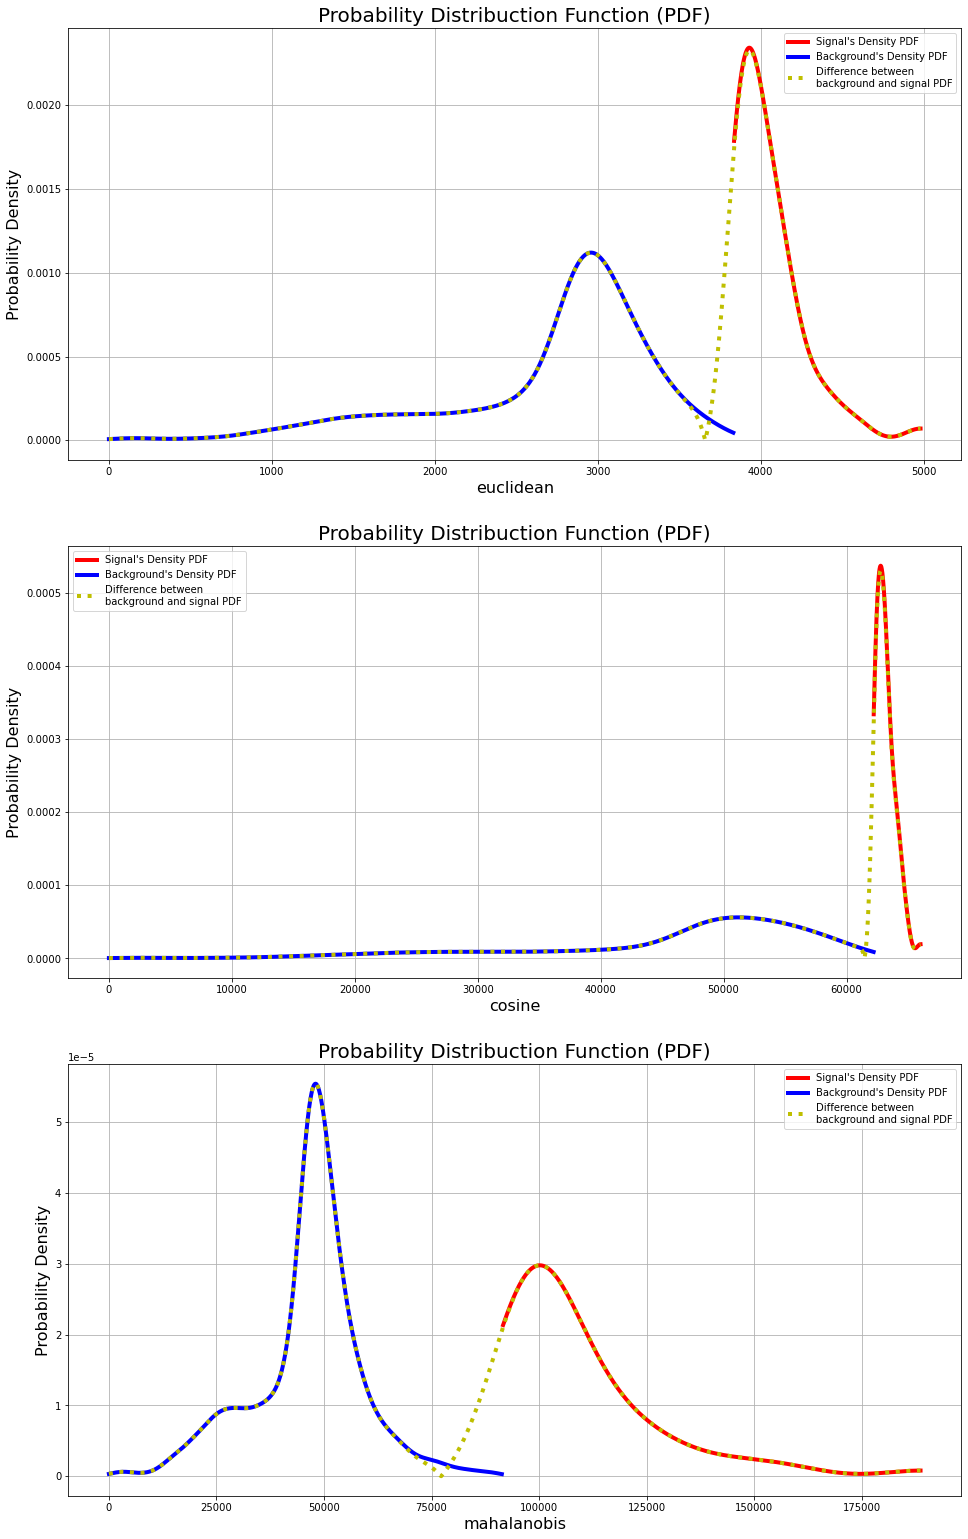

In [105]:
fig = plt.figure(figsize=[16,9*(len(distances_dict)-1)])
ax = fig.subplots(len(distances_dict)-1)

for i, att in enumerate(distances_dict):
    print(att)
    
    if att == 'Bayes Probability':
        break
        
    else:
        signal_streaming_var = distances_dict[att]['eda']['sg']
        background_streaming_var = distances_dict[att]['eda']['bc']
    
    signal_streaming_var = np.sort(signal_streaming_var)
    background_streaming_var = np.sort(background_streaming_var)

    signal_kde = stats.gaussian_kde(signal_streaming_var)
    background_kde = stats.gaussian_kde(background_streaming_var)
    
    print('       fitted kde')
    
    data_eval = np.linspace(min(min(background_streaming_var),min(signal_streaming_var)),
                            max(max(background_streaming_var),max(signal_streaming_var)),
                            1000)
    
    background_eval = np.linspace(min(background_streaming_var),
                            max(background_streaming_var), 
                            1000)
    signal_eval = np.linspace(min(signal_streaming_var),
                              max(signal_streaming_var),
                              1000)

    # Plot the Probability Distribuction Function (PDF)
    
    ax[i].set_ylabel('Probability Density',fontsize=16)
    ax[i].set_xlabel(att,fontsize=16)
    ax[i].set_title('Probability Distribuction Function (PDF)',fontsize=20)
        
    ax[i].plot(signal_eval, signal_kde(signal_eval),'r', linewidth=4, label='Signal\'s Density PDF')
    ax[i].plot(background_eval, background_kde(background_eval),'b', linewidth=4, 
               label='Background\'s Density PDF')
    ax[i].plot(data_eval, np.sqrt((signal_kde(data_eval) - background_kde(data_eval))**2),':y', 
            linewidth=4, label='Difference between\nbackground and signal PDF')

    ax[i].grid()
    ax[i].legend()
    
    print('        plotted')
    
plt.show()
fig.savefig('Bayes_EDA_PDF.pdf', bbox_inches='tight')

euclidean
       fitted kde
        plotted
cosine
nada
mahalanobis
       fitted kde
        plotted
Bayes Probability
nada


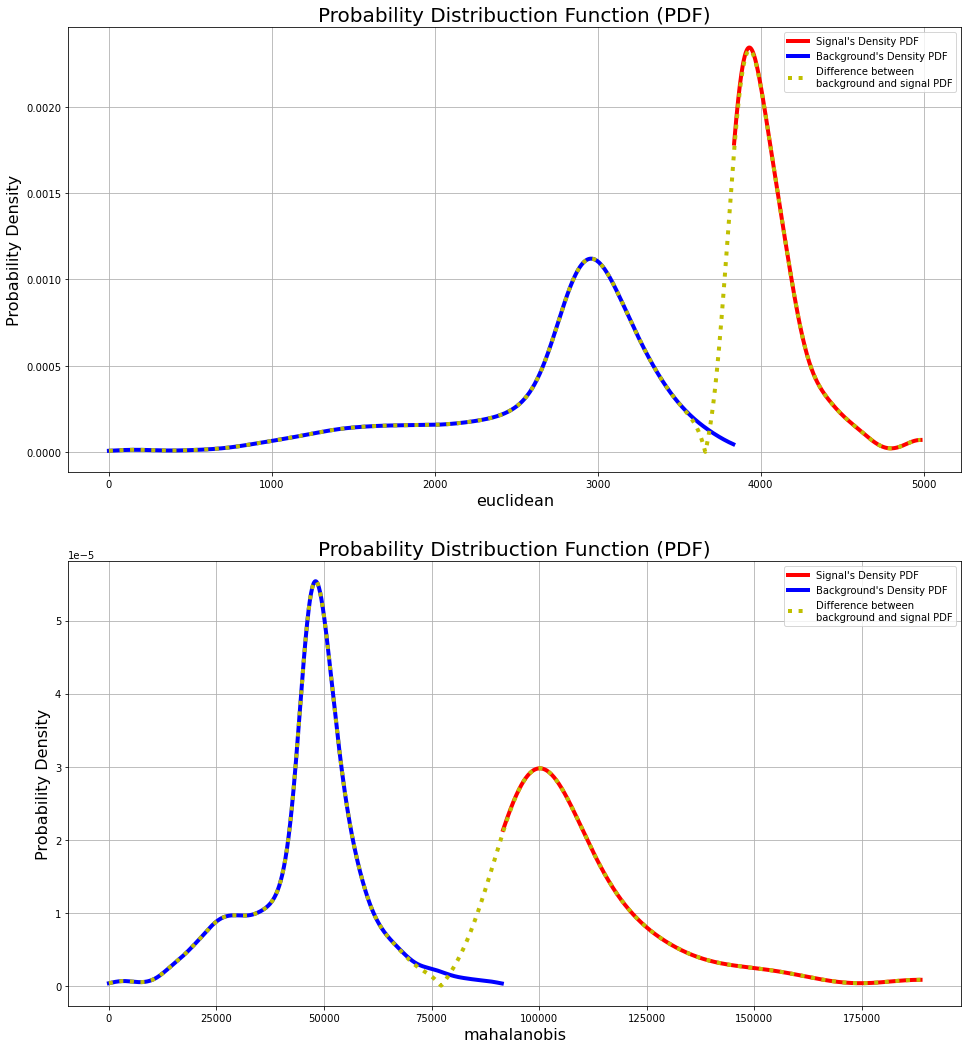

In [106]:
fig = plt.figure(figsize=[16,9*(len(distances_dict)-2)])
ax = fig.subplots(len(distances_dict)-2)

i = 0

for att in distances_dict:
    print(att)
    
    if att == 'mahalanobis' or att == 'euclidean':
        signal_streaming_var = distances_dict[att]['eda']['sg']
        background_streaming_var = distances_dict[att]['eda']['bc']
        
        signal_streaming_var = np.sort(signal_streaming_var)
        background_streaming_var = np.sort(background_streaming_var)

        signal_kde = stats.gaussian_kde(signal_streaming_var)
        background_kde = stats.gaussian_kde(background_streaming_var)

        print('       fitted kde')

        data_eval = np.linspace(min(min(background_streaming_var),min(signal_streaming_var)),
                                max(max(background_streaming_var),max(signal_streaming_var)),
                                1000)

        background_eval = np.linspace(min(background_streaming_var),
                                max(background_streaming_var), 
                                1000)
        signal_eval = np.linspace(min(signal_streaming_var),
                                  max(signal_streaming_var),
                                  1000)

        # Plot the Probability Distribuction Function (PDF)

        ax[i].set_ylabel('Probability Density',fontsize=16)
        ax[i].set_xlabel(att,fontsize=16)
        ax[i].set_title('Probability Distribuction Function (PDF)',fontsize=20)

        ax[i].plot(signal_eval, signal_kde(signal_eval),'r', linewidth=4, label='Signal\'s Density PDF')
        ax[i].plot(background_eval, background_kde(background_eval),'b', linewidth=4, 
                   label='Background\'s Density PDF')
        ax[i].plot(data_eval, np.sqrt((signal_kde(data_eval) - background_kde(data_eval))**2),':y', 
                linewidth=4, label='Difference between\nbackground and signal PDF')

        ax[i].grid()
        ax[i].legend()
        i += 1
        print('        plotted')
    else:
        print('nada')
    
plt.show()
fig.savefig('Best_Bayes_EDA_PDF.png', bbox_inches='tight')